In [6]:
import pandas as pd
import numpy as np
#use kernel: brainrender-env


In [56]:
# MANUAL IMPUT
csv_file = "/home/gabri/Desktop/test_abba/587-final-test/all_xls_synapses/whole_brain.csv"
brain_id = "587"

# EDA

In [18]:
# Sample data creation (assuming you have a CSV file or DataFrame)
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

             ROI  Synapses  Area
0     Left: FRP1         0   0.0
1    Right: FRP1         0   0.0
2   Left: FRP2/3         0   0.0
3  Right: FRP2/3         0   0.0
4     Left: FRP5         0   0.0


In [19]:
# Calculate cell density (Synapses per Unit Area)
df['Cell Density'] = df['Synapses'] / df['Area']

# Display the DataFrame with the new column
print("\nDataFrame with Cell Density:\n", df.head())


DataFrame with Cell Density:
              ROI  Synapses  Area  Cell Density
0     Left: FRP1         0   0.0           NaN
1    Right: FRP1         0   0.0           NaN
2   Left: FRP2/3         0   0.0           NaN
3  Right: FRP2/3         0   0.0           NaN
4     Left: FRP5         0   0.0           NaN


In [22]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values if necessary
df = df.fillna(0)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 ROI                0
Synapses           0
Area               0
Cell Density    1700
dtype: int64

Missing Values:
 ROI             0
Synapses        0
Area            0
Cell Density    0
dtype: int64


In [23]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
           Synapses          Area  Cell Density
count  2076.000000  2.076000e+03   2076.000000
mean     34.567437  2.975715e+04      0.000209
std     256.203059  1.027907e+05      0.000971
min       0.000000  0.000000e+00      0.000000
25%       0.000000  0.000000e+00      0.000000
50%       0.000000  0.000000e+00      0.000000
75%       0.000000  0.000000e+00      0.000000
max    7369.000000  1.189128e+06      0.015101


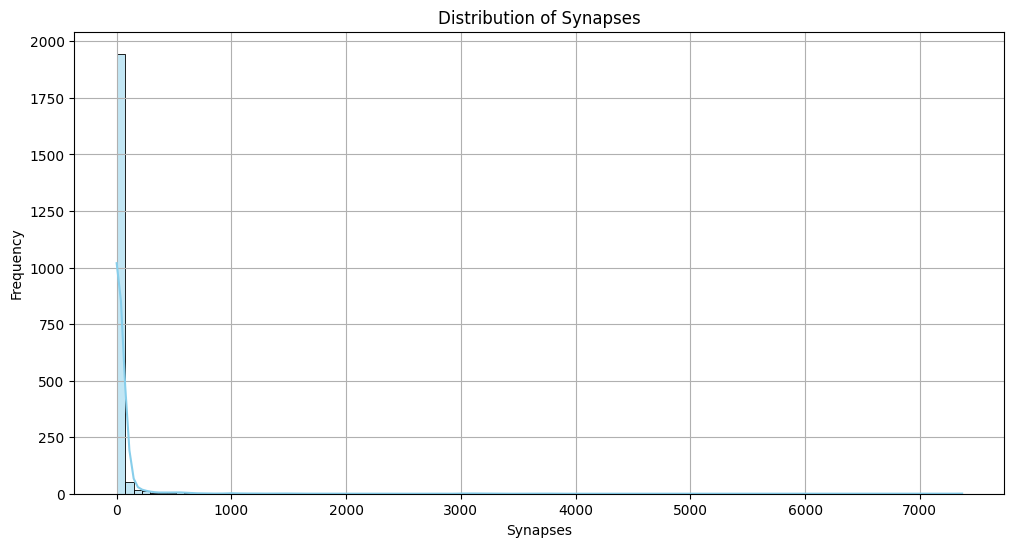

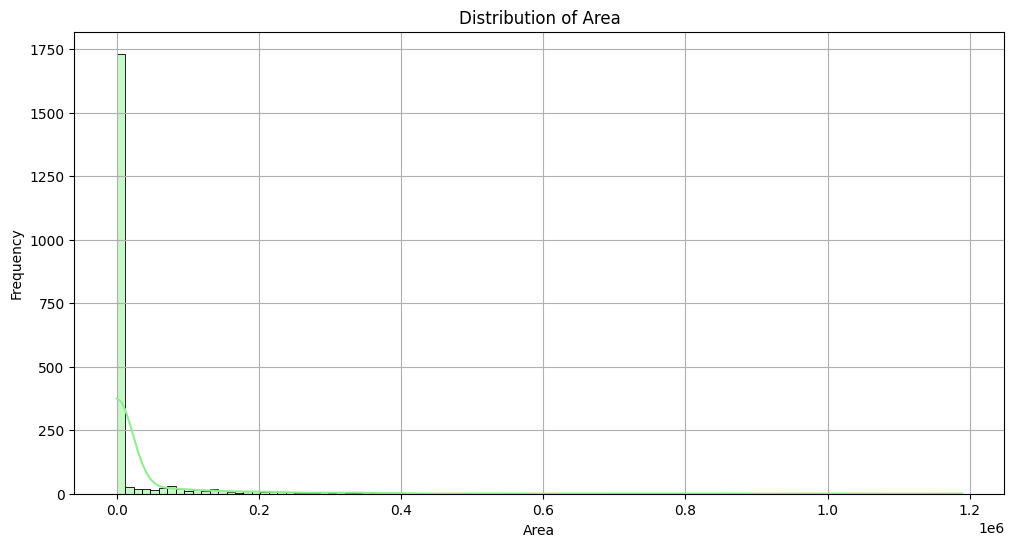

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Synapses
plt.figure(figsize=(12, 6))
sns.histplot(df['Synapses'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Synapses')
plt.xlabel('Synapses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Area
plt.figure(figsize=(12, 6))
sns.histplot(df['Area'], bins=100, kde=True, color='lightgreen')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


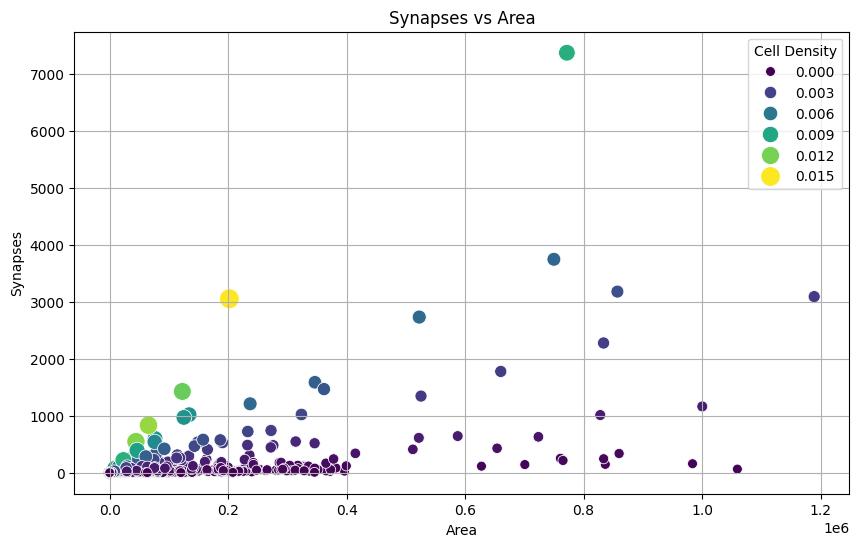

In [26]:
# Scatter plot for Synapses vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Synapses', data=df, hue='Cell Density', palette='viridis', size='Cell Density', sizes=(50, 200))
plt.title('Synapses vs Area')
plt.xlabel('Area')
plt.ylabel('Synapses')
plt.grid(True)
#plt.colorbar(label='Cell Density')
plt.show()


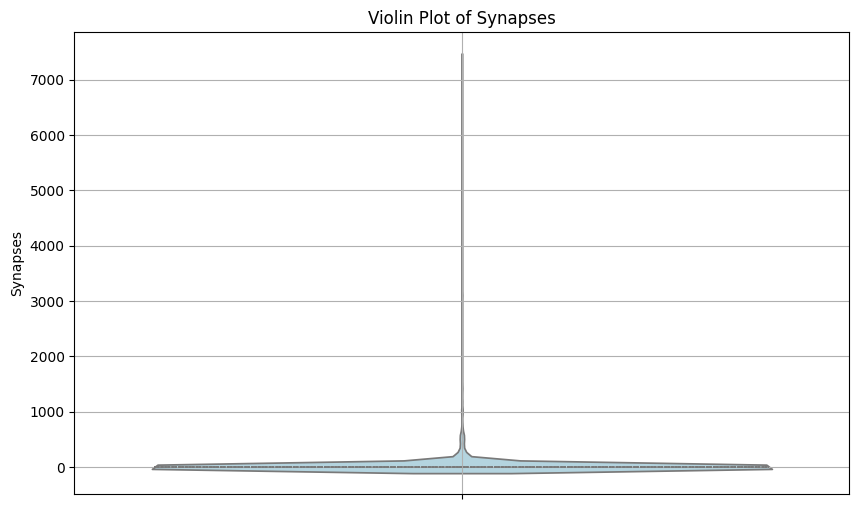

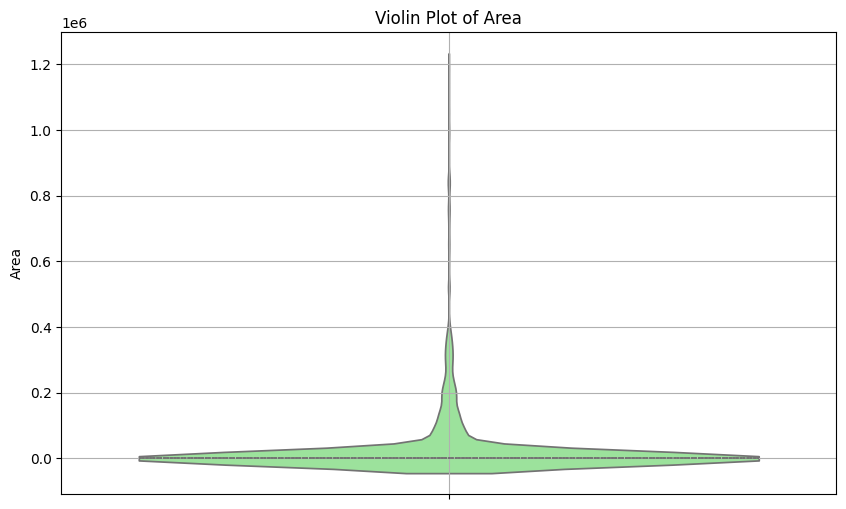

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Synapses
plt.figure(figsize=(10, 6))
sns.violinplot(y='Synapses', data=df, inner='quartile', color='lightblue')
plt.title('Violin Plot of Synapses')
plt.ylabel('Synapses')
plt.grid(True)
plt.show()

# Violin plot for Area
plt.figure(figsize=(10, 6))
sns.violinplot(y='Area', data=df, inner='quartile', color='lightgreen')
plt.title('Violin Plot of Area')
plt.ylabel('Area')
plt.grid(True)
plt.show()



/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


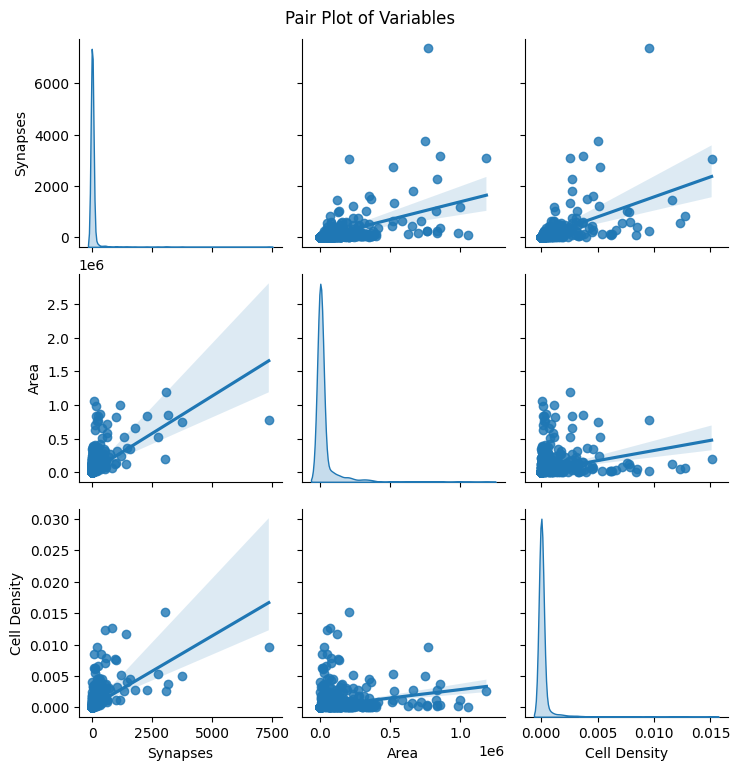

In [28]:
# Pair plot for all variables
sns.pairplot(df, kind='reg', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()



Correlation Matrix:
               Synapses      Area  Cell Density
Synapses      1.000000  0.553098      0.592460
Area          0.553098  1.000000      0.284154
Cell Density  0.592460  0.284154      1.000000


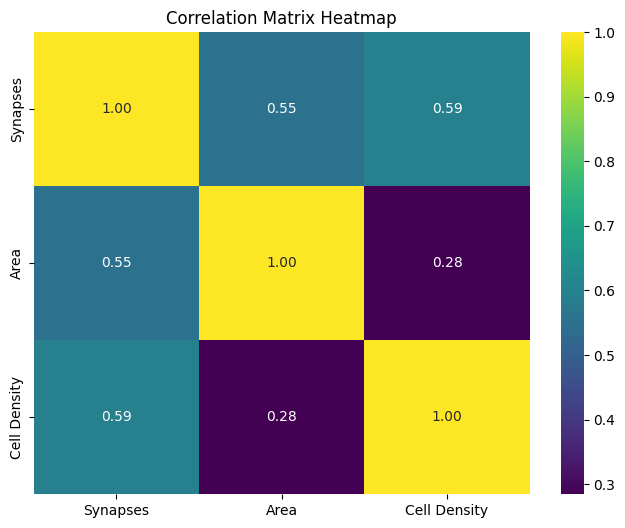

In [29]:
# Correlation matrix
correlation_matrix = df[['Synapses', 'Area', 'Cell Density']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



Linear Regression Results:
Slope (Coefficient): 0.00
Intercept: -6.46


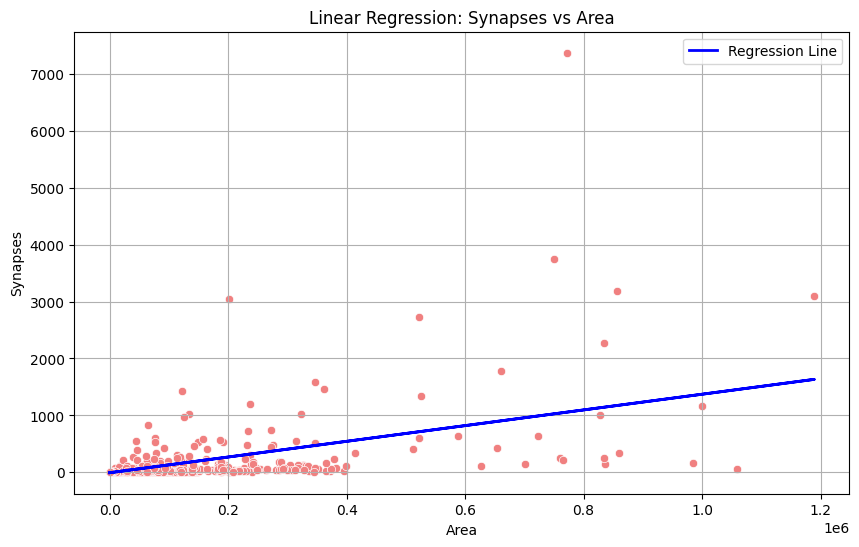

In [31]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = df[['Area']].values  # Independent variable
y = df['Synapses'].values  # Dependent variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("\nLinear Regression Results:")
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Synapses', data=df, color='lightcoral')
plt.plot(df['Area'], model.predict(X), color='blue', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Synapses vs Area')
plt.xlabel('Area')
plt.ylabel('Synapses')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
import plotly.express as px

# 3D Scatter Plot for Synapses, Area, and Cell Density
fig = px.scatter_3d(df, x='Area', y='Synapses', z='Cell Density',
                    color='ROI', size='Synapses',
                    labels={'Area':'Area', 'Synapses':'Synapses', 'Cell Density':'Cell Density'},
                    title='3D Scatter Plot of Cells, Area, and Density')
fig.update_traces(marker=dict(size=8))
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

/tmp/ipykernel_11348/3480394463.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




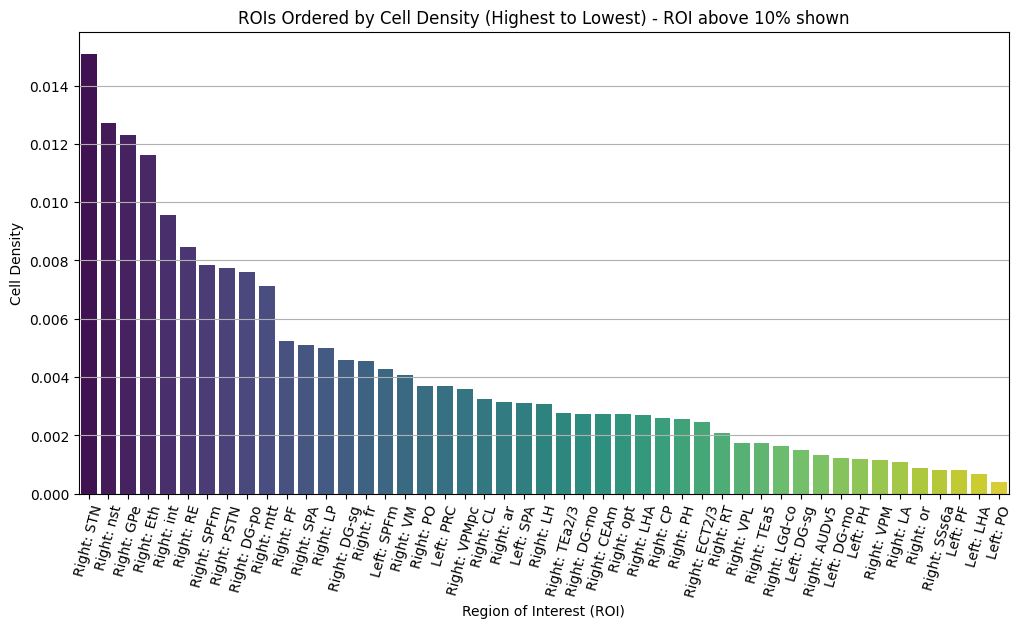

In [ ]:
df_sorted = df.sort_values(by='Cell Density', ascending=False)
df_sorted = df_sorted[df_sorted["Synapses"] != 0]
percentage = 10
thr = df_sorted.iloc[0,1] * (percentage/100) #df_sorted.iloc[0,1] is the max
df_sorted = df_sorted[df_sorted["Synapses"] > thr]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y='Cell Density', data=df_sorted, palette='viridis')
plt.title(f'ROIs Ordered by Cell Density (Highest to Lowest) - ROI above {percentage}% shown')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Cell Density')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

# Heat-Map Brain

In [57]:
import matplotlib.pyplot as plt
import os
import bg_atlasapi as bgh  # Import BrainGlobe's Heatmap object, assuming this is where it's from

#INPUT: folder where to save the images:
output_directory = "/home/gabri/Desktop/test_abba/587-final-test/python_images"  # Replace with the correct directory
side = "right" #choose between "right" or "left"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [58]:
# Define regions of interest and output directory
regions = df.set_index('ROI')['Cell Density'].to_dict()

regions

# Take only left or right side --> heatmap do not take into accout lrft/right
if side == "right":
    temp = "Right: "
else:
    temp = "Left: "
regions = {key: value for key, value in regions.items() if temp in key}

# Function to remove specific substrings from dictionary keys
def clean_keys(d):
    # Create a new dictionary with cleaned keys
    cleaned_dict = {}
    for key, value in d.items():
        # Remove specific substrings
        new_key = key.replace("Left: ", "").replace("Right: ", "")
        cleaned_dict[new_key] = value
    return cleaned_dict
regions = clean_keys(regions)

regions

# take only regions that have values !=0
regions = {key: value for key, value in regions.items() if value != 0}

regions



{
    'SSp-bfd1': 0.00010589043264813819,
    'SSp-bfd2/3': 7.063949938795918e-05,
    'SSp-bfd4': 8.753628310547e-05,
    'SSp-bfd5': 0.0001766404275340675,
    'SSp-bfd6a': 0.00030045421165446866,
    'SSp-bfd6b': 0.0005084581238511543,
    'SSp-tr5': 0.00014425226836692006,
    'SSp-tr6a': 0.0006236780736482456,
    'SSp-tr6b': 0.0006627030711553755,
    'SSs1': 0.00011901810066947681,
    'SSs2/3': 5.842813297909191e-05,
    'SSs4': 8.864166199025079e-05,
    'SSs5': 0.0003700764161922195,
    'SSs6a': 0.0008198013862359205,
    'SSs6b': 0.0006199496246647844,
    'VISC5': 0.0009024393630166466,
    'VISC6a': 0.0014333308219417222,
    'VISC6b': 0.0013529740059869098,
    'AUDd1': 0.00019812007820195726,
    'AUDd2/3': 0.00015349748982088822,
    'AUDd4': 0.0003875237358288195,
    'AUDd5': 0.0007791043133503065,
    'AUDd6a': 0.0011023650980711236,
    'AUDd6b': 0.001738034717243477,
    'AUDp1': 0.0001434851098327271,
    'AUDp2/3': 0.00015764529521947808,
    'AUDp4': 0.0004466

## 2D

In [64]:
import brainglobe_heatmap as bgh

# Iterate over cuts range
for cut in range(2050, 13000, 100):
    plt.figure()  # Create a new figure each iteration
    
    # Create Heatmap object
    f = bgh.Heatmap(
        regions,
        position=cut,
        orientation="frontal",  # Adjust orientation as needed
        title=f"brain: {brain_id} - Side: {side} - Slice position: {cut}",
        vmin=0,
        vmax=0.01,
        cmap='Reds',
        atlas_name="allen_mouse_25um",
        format='3D',
        thickness=2000,  
    )

    f.show()
    break
    
    # Plot the heatmap
    #fig = f.plot(show_legend=False, xlabel='µm', ylabel='µm', hide_axes=False)
    
    # Save the figure as PDF
    fig.savefig(os.path.join(output_directory, f'{brain_id}-{side}-{cut}.pdf'), dpi=100)
    
    # Save as SVG
    # fig.savefig(os.path.join(output_directory, f'heatmap_{cut}.svg'), dpi=100)


<Figure size 640x480 with 0 Axes>

## 3D

In [74]:
# Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

bgh.Heatmap(
    regions,
    position=(
        5000
    ),
    orientation="horizontal",  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    title="horizontal view",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
).show()

# Create a scene
#from brainrender import Scene
#popup_scene = Scene(atlas_name='allen_mouse_50um', title='popup') #put insde the atlas
#popup_scene.render()  # press 'Esc' to close

A `brainrender.scene.Scene` with 188 actors.